Initial timeseries on non-calibrated raw data

In [1]:
import sys
sys.path.append("..")

import pandas as pd 
from channeling_lib import AWS_file_loader, save_figure, load_path
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.dates as mdates



# Specify general folder:
aws_path = load_path()+'RawData/AWS/'

stations_str = ['Tom Joad','Rosanna','Bette Davis', 'Layla', 'Mrs Robinson']
# FROM LOW TO HIGH

In [2]:
aws_station_data = {}
cutoff_date = pd.Timestamp("2025-01-26")


# Loop through each station
for station in stations_str:
    station_folder = os.path.join(aws_path, station)  # Full folder path
    
    # Find all .dat files in the folder
    dat_files = glob.glob(os.path.join(station_folder, "*.dat"))
    
    # Load all .dat files using AWS_file_loader
    aws_station_data[station] = [
        AWS_file_loader(file).iloc[:-3].loc[lambda df: df.index > cutoff_date] for file in dat_files
    ]

c:\Users\alber\anaconda3\envs\boundary_layer\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
c:\Users\alber\anaconda3\envs\boundary_layer\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
c:\Users\alber\anaconda3\envs\boundary_layer\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_object

In [3]:
(aws_station_data['Rosanna'][1])

,RECORD,BattV,temperature,rel_humidity,wind_speed,gust_speed,wind_direction,air_pressure
TIMESTAMP,,,,,,,,
2025-01-31 11:10:00,29976.0,12.63355,-2.351294,65.53271,4.1750,4.55,283.8398,1012.766
2025-01-31 11:11:00,29977.0,12.65034,-2.300291,66.09283,4.5000,5.15,262.0825,1012.848
2025-01-31 11:12:00,29978.0,12.65118,-2.345823,65.68990,5.4875,6.65,267.0109,1012.638
2025-01-31 11:13:00,29979.0,12.62768,-2.356762,64.59558,6.0500,6.80,252.8824,1012.638
2025-01-31 11:14:00,29980.0,12.61509,-2.373298,64.56200,5.9000,6.65,275.7841,1012.522
...,...,...,...,...,...,...,...,...
2025-02-03 09:12:00,34178.0,12.61173,1.065732,55.30376,6.4000,9.80,103.9253,1017.949
2025-02-03 09:13:00,34179.0,12.61341,1.046781,56.83154,6.6000,9.95,118.5415,1018.047
2025-02-03 09:14:00,34180.0,12.61089,0.990817,57.01011,5.1000,6.50,111.3374,1017.964


In [4]:
# color_idx = ['blue', 'red', 'green', 'purple', 'orange']

color_idx = ['#440154', '#3b528b', '#21918c', '#5ec962', '#fde725']



'../figs/nonCalibrated_temp_timeseries.png'

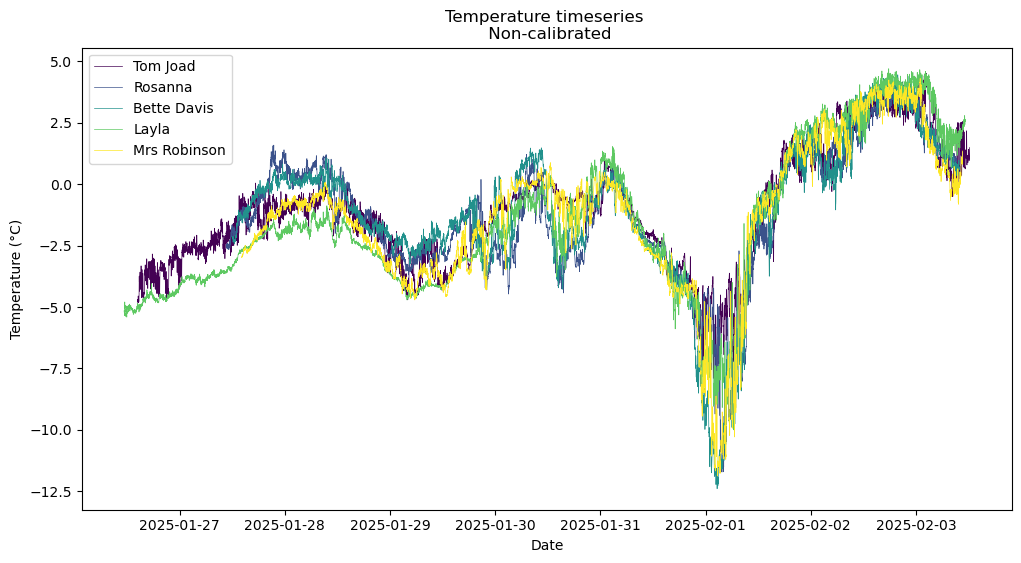

In [5]:
# Temperature timeseries
fig, ax = plt.subplots(figsize=(12, 6))

for i, station in enumerate(stations_str):
    ax.plot(aws_station_data[station][0].index, aws_station_data[station][0].temperature, label=station, linewidth = 0.5, color=color_idx[i])
    ax.plot(aws_station_data[station][1].index, aws_station_data[station][1].temperature, linewidth = 0.5, color=color_idx[i])
    

ax.set_xlabel("Date")
ax.set_ylabel("Temperature (°C)")
ax.set_title("Temperature timeseries \n Non-calibrated")
ax.legend()

save_figure(fig, '../figs/', 'nonCalibrated_temp_timeseries')

> There is less variability in the stations near the water, more up Adventdalen.

'../figs/nonCalibrated_windSpeed_timeseries.png'

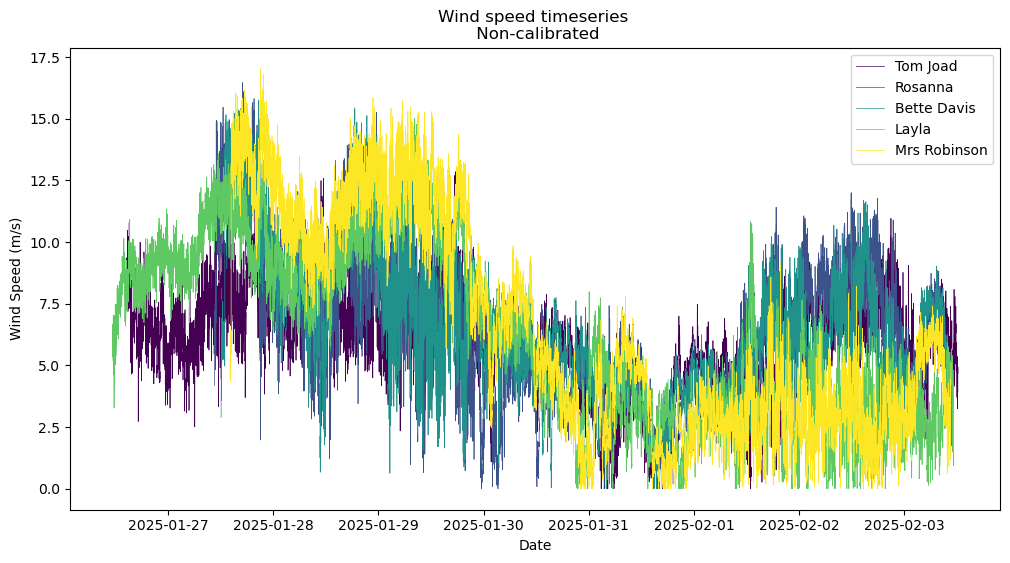

In [6]:
# Wind speed timeseries

fig, ax = plt.subplots(figsize=(12, 6))

for i, station in enumerate(stations_str):
    ax.plot(aws_station_data[station][1].index, aws_station_data[station][1].wind_speed, label=station, linewidth=0.5, color=color_idx[i])
    ax.plot(aws_station_data[station][0].index, aws_station_data[station][0].wind_speed, linewidth=0.5, color=color_idx[i])

ax.set_xlabel("Date")
ax.set_ylabel("Wind Speed (m/s)")
ax.set_title("Wind speed timeseries \n Non-calibrated")
ax.legend()

save_figure(fig, '../figs/', 'nonCalibrated_windSpeed_timeseries')

> Low pressure: higher wind upvalley than downvalley, low pressure: lower wind upvalley than down valley.

'../figs/nonCalibrated_windDirection_timeseries.png'

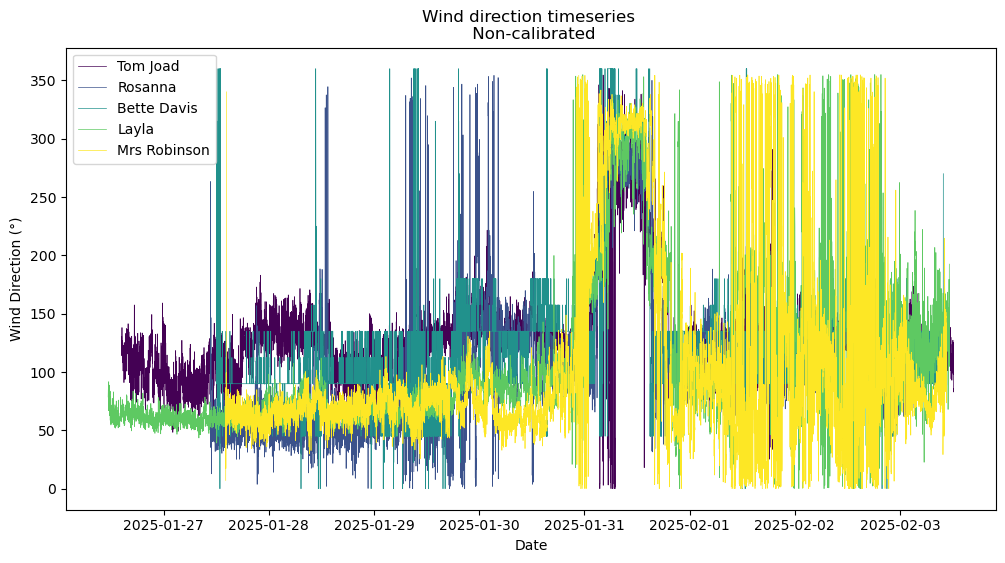

In [7]:
# Wind direction timeseries

fig, ax = plt.subplots(figsize=(12, 6))

for i, station in enumerate(stations_str):
    ax.plot(aws_station_data[station][0].index, aws_station_data[station][0].wind_direction, label=station, linewidth = 0.5,  color=color_idx[i])
    ax.plot(aws_station_data[station][1].index, aws_station_data[station][1].wind_direction, linewidth = 0.5,  color=color_idx[i])

ax.set_xlabel("Date")
ax.set_ylabel("Wind Direction (°)")
ax.set_title("Wind direction timeseries \n Non-calibrated")
ax.legend()

save_figure(fig, '../figs/', 'nonCalibrated_windDirection_timeseries')

> Pressure change: very different winds!!

'../figs/nonCalibrated_relHumidity_timeseries.png'

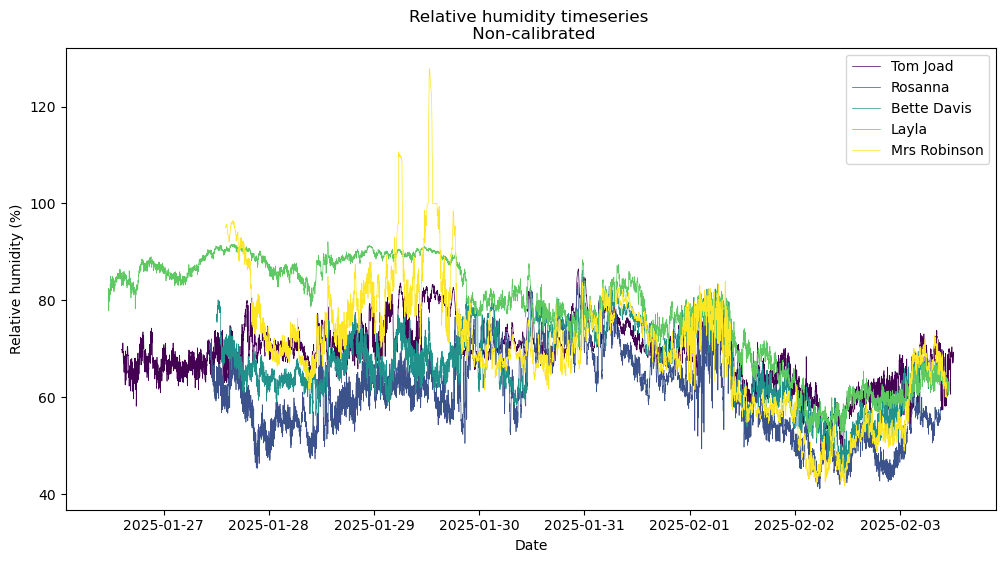

In [8]:
# relative humidity timeseries

fig, ax = plt.subplots(figsize=(12, 6))

for i, station in enumerate(stations_str):
    ax.plot(aws_station_data[station][0].index, aws_station_data[station][0].rel_humidity, label=station, linewidth = 0.5, color=color_idx[i])
    ax.plot(aws_station_data[station][1].index, aws_station_data[station][1].rel_humidity, linewidth = 0.5, color=color_idx[i])

ax.set_xlabel("Date")
ax.set_ylabel("Relative humidity (%)")
ax.set_title("Relative humidity timeseries \n Non-calibrated")
ax.legend()

save_figure(fig, '../figs/', 'nonCalibrated_relHumidity_timeseries')

> Higher up: higher relative humidity, but is it just because of a lower temperature? Is the absolute air water content the same?

'../figs/nonCalibrated_pressure_timeseries.png'

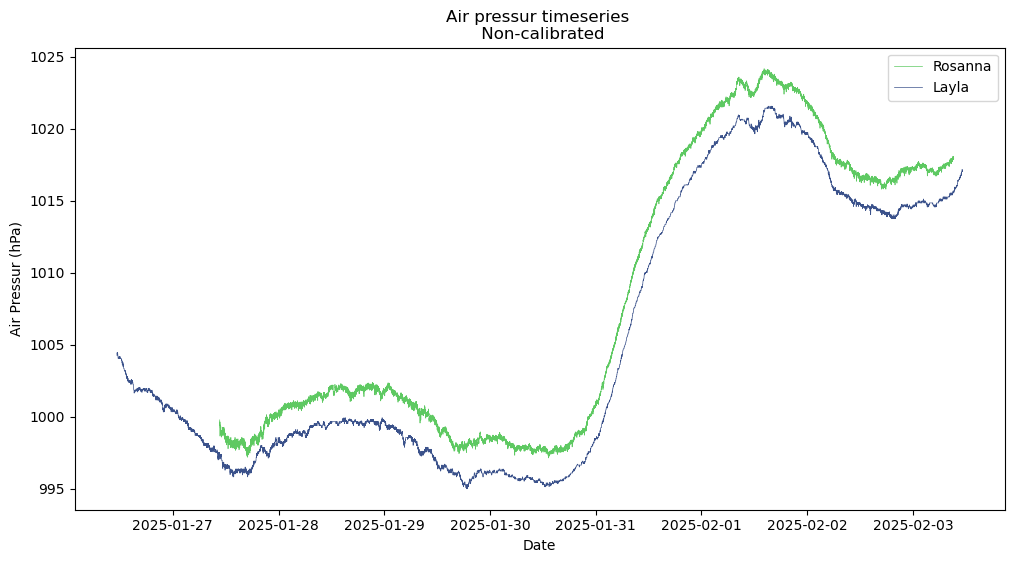

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(aws_station_data['Rosanna'][0].index, aws_station_data['Rosanna'][0].air_pressure, label='Rosanna', linewidth = 0.5, color=color_idx[3])
ax.plot(aws_station_data['Rosanna'][1].index, aws_station_data['Rosanna'][1].air_pressure, linewidth = 0.5, color=color_idx[3])
ax.plot(aws_station_data['Layla'][0].index, aws_station_data['Layla'][0].air_pressure, label='Layla', linewidth = 0.5, color=color_idx[1])
ax.plot(aws_station_data['Layla'][1].index, aws_station_data['Layla'][1].air_pressure, linewidth = 0.5, color=color_idx[1])
ax.legend()
ax.set_xlabel("Date")
ax.set_ylabel("Air Pressur (hPa)")
ax.set_title("Air pressur timeseries \n Non-calibrated")

save_figure(fig, '../figs/', 'nonCalibrated_pressure_timeseries')

> Is the Pressure difference only due to the elevation difference?